# Task 1

### Step 1: Imports and reading the data

In [334]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()


### Step 1 & 2: Read the data and transform it into a matrix

In [335]:
# Read the data
train_df = pd.read_csv('adult_train.csv')
test_df = pd.read_csv('adult_test.csv')

# Split the data into X and y
X_train = train_df.drop(['target'], axis=1)
y_train = train_df['target']

# Same for test
X_test = test_df.drop(['target'], axis=1)
y_test = test_df['target']

# Encode the data using DictVectorizer
X_train_dicts = X_train.to_dict(orient='records')
X_train_encoded = dv.fit_transform(X_train_dicts)

#Same for test
X_test_dicts = X_test.to_dict(orient='records')
X_test_encoded = dv.transform(X_test_dicts)

#### Using cross validation like we did last week

In [336]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(random_state=0)
print(np.mean(cross_val_score(clf, X_train_encoded, y_train)))


0.8656675592304335


### Step 3

#### Implementing pipeline

In [337]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    DictVectorizer(),
    GradientBoostingClassifier(random_state=0)
)

# Fit the pipeline on the training set, as instructed
pipeline.fit(X_train_dicts, y_train)

# Predict the labels of the test set
y_pred= pipeline.predict(X_test_dicts)

# Compute the accuracy compared to the true labels
accuracy_score(y_test, y_pred)

0.8711381364781033

As we can see the ressult from the pipelined method is the same as the result from the non-pipelined method. This is suggestive of it working

## Task 2

### Underfitting and overfitting in decision tree classifiers.

-------------Assigntment 1: Task 4 (to be reproduced)----------------

Step 4. Underfitting and overfitting

For the apartment price prediction task, draw a plot that shows the evaluation score on the training set and on the test set for different values of max_depth, ranging from 0 to 12. (It's probably easiest if you implement a function to draw this plot, but it's also OK if you draw the plot by hand.)



In [338]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with a decision tree classifier
pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier(random_state = 0)
)

test_range_max_depth = range(1, 30, 3)
datapoints = []

#For each depth, fit the pipeline and compute the accuracy
for depth in test_range_max_depth:
    pipeline.set_params(decisiontreeclassifier__max_depth=depth)
    pipeline.fit(X_train_dicts, y_train)
    y_pred = pipeline.predict(X_test_dicts)
    datapoints.append(accuracy_score(y_test, y_pred))

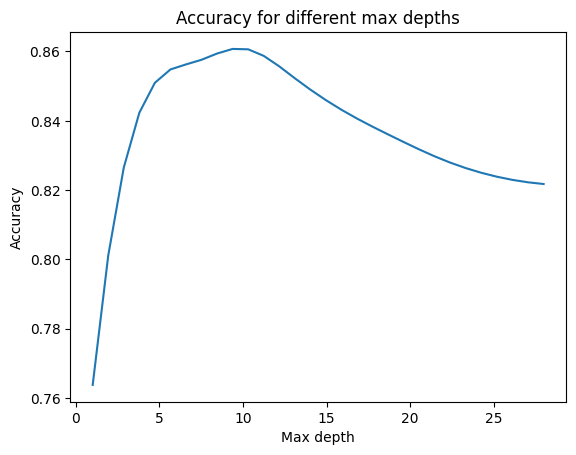

In [339]:
from scipy.interpolate import make_interp_spline

# Plot the accuracy for each depth in a line graph
# Plot with smoothing so that we get 1 datapoint at every integer
X_Y_spline = make_interp_spline(test_range_max_depth, datapoints)
X_ = np.linspace(test_range_max_depth[0],
                 test_range_max_depth[-1], 30)
Y_ = X_Y_spline(X_)
plt.plot(X_, Y_)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Accuracy for different max depths')
plt.show()

As we can can see from the graph there we gain nothing from adding more depth than 6 when using the DecisionTreeClasifier to this specific dataset. 

### Underfitting and overfitting in random forest classifiers.

In [341]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with a decision tree classifier
pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

test_range_n_classifiers = range(1, 210, 25)

datapoints = []

# For each n_classifiers, fit the pipeline and compute the accuracy
for n_classifiers in test_range_n_classifiers:
    data = []
    for max_depth in test_range_max_depth:
        pipeline.set_params(randomforestclassifier__n_estimators=n_classifiers, randomforestclassifier__max_depth=max_depth)
        pipeline.fit(X_train_dicts, y_train)
        y_pred = pipeline.predict(X_test_dicts)
        data.append(accuracy_score(y_test, y_pred))
    
    datapoints.append((data, n_classifiers))

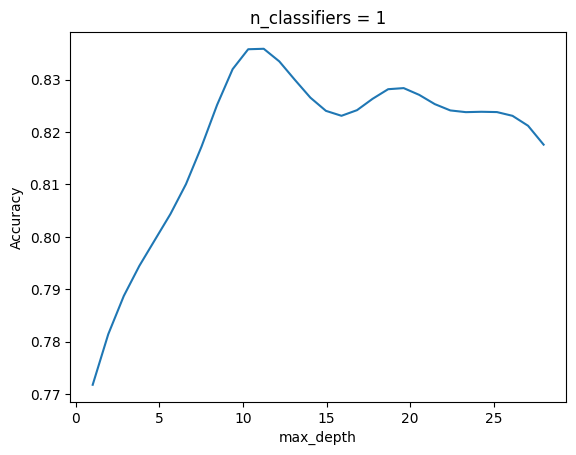

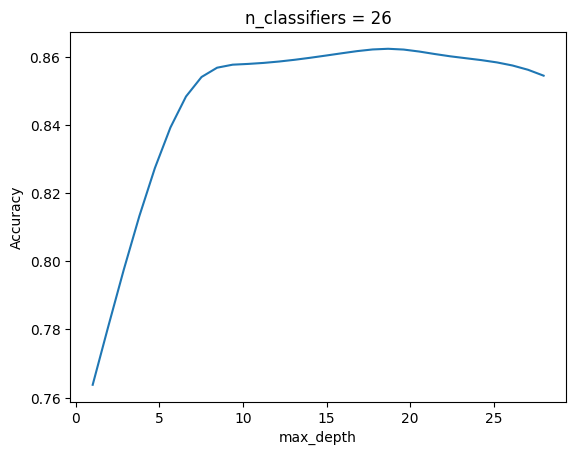

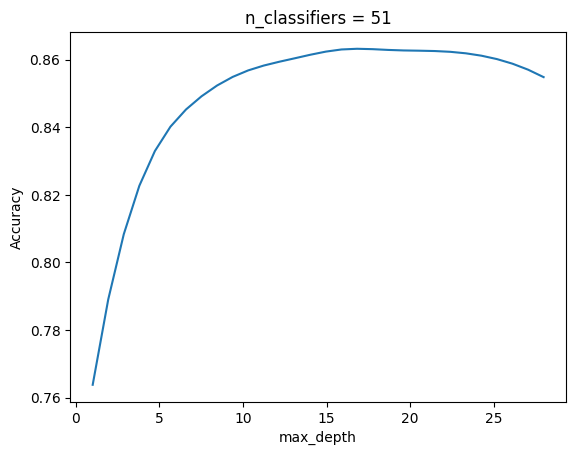

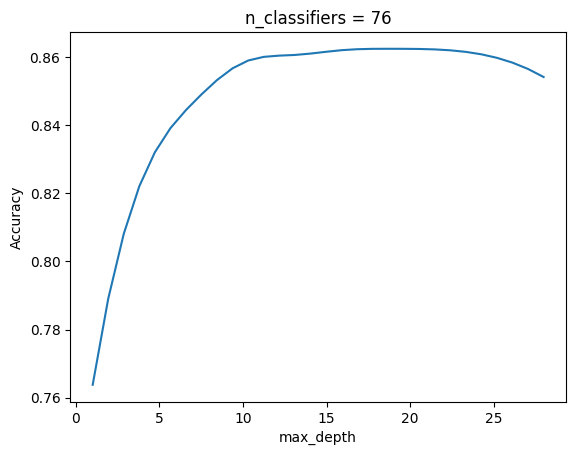

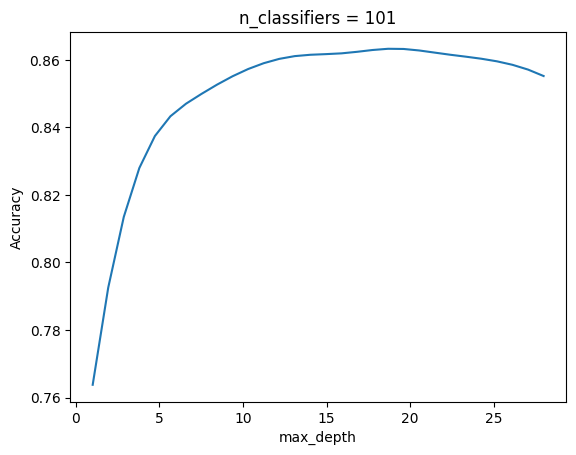

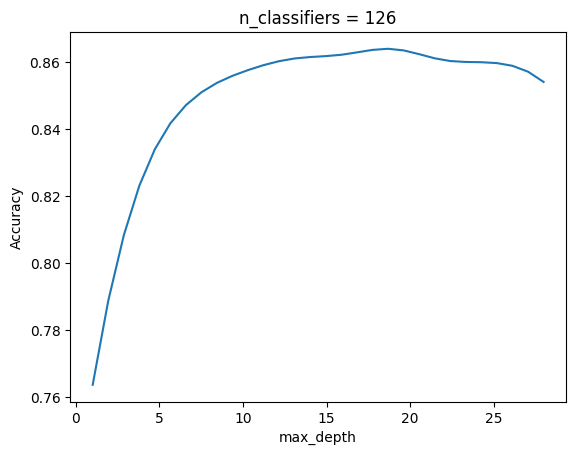

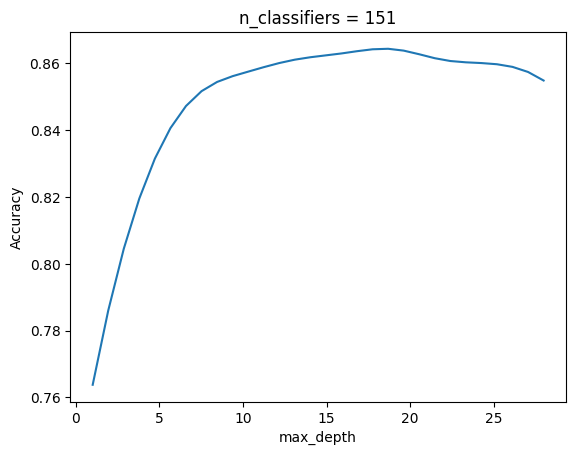

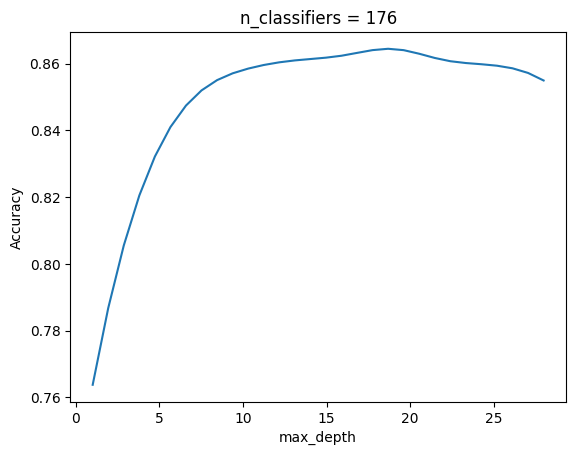

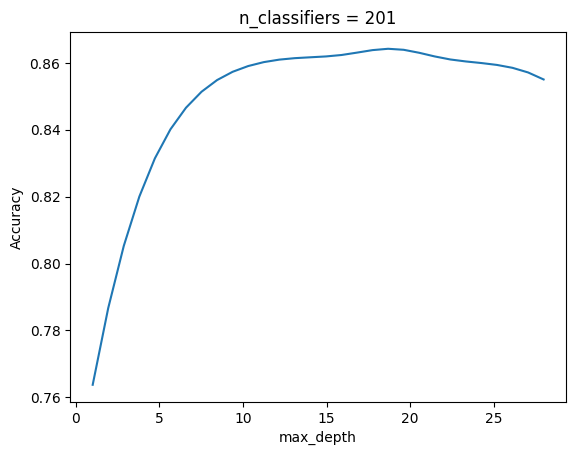

In [342]:
# Plot the accuracy for each ensemble in a line graph
for datapoint in datapoints:
    #Plot with smoothing so that we get 1 datapoint at every integer
    X_Y_spline = make_interp_spline(test_range_max_depth, datapoint[0])
    X_ = np.linspace(test_range_max_depth[0],
                     test_range_max_depth[-1], 30)
    Y_ = X_Y_spline(X_)
    plt.plot(X_, Y_)

    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title('n_classifiers = ' + str(datapoint[1]))
    plt.show()

### Discussion: 

__What's the difference between the curve for a decision tree and for arandom forest with an ensemble size of 1, and why do we see this difference?__



We do not know why, they should be the same since it is just one decision tree? The depth changes accordingly 

__What happens with the curve for random forests as the ensemble sizegrows?__

The curve seem to get more and more predictable. As well as being smoother. It does not however seem to get more accurate.

__What happens with the best observed test set accuracy as the ensemblesize grows?__

For n_classiifiers = 1 the accuracy is at .83 but for the rest it peaks at .86 and never really improves the more you increase n_classifiers.

__What happens with the training time as the ensemble size grows?__

The time it takes to train takes train grows faster than linnearly.

## Task 3

In [343]:
# Train a radnom forest with some good parameters
pipeline.set_params(randomforestclassifier__n_estimators=100,
                    randomforestclassifier__max_depth=15)
pipeline.fit(X_train_dicts, y_train)

#Echo the feature importances and names
feature_names       = pipeline.steps[0][1].feature_names_
feature_importances = pipeline.steps[1][1].feature_importances_

# Combine the feature names and importances into a dataframe and print the top 10
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importances_df.sort_values(by='importance', ascending=False, inplace=True)
feature_importances_df.head(10)

,feature,importance
1,capital-gain,0.144056
23,marital-status=Married-civ-spouse,0.111006
3,education-num,0.106807
90,relationship=Husband,0.087982
0,age,0.079051
20,hours-per-week,0.056889
25,marital-status=Never-married,0.044480
2,capital-loss,0.037064
74,occupation=Exec-managerial,0.026946
80,occupation=Prof-specialty,0.022573


The most impoortant feature is __capital gain__. If capital gain is zero does that strongly imply that tarrget is <=50? or is it that if capital gain is more than zero the target is >50? To investigate this we wrote the following code: 

In [344]:
# Create a new dataframe with only the capital-gain and target columns
capital_gain_df = train_df[['capital-gain', 'target']]
# Sort df by capital-gain and remove cases where capital-gain is 0
capital_gain_df = capital_gain_df[capital_gain_df['capital-gain'] != 0]
capital_gain_df = capital_gain_df.sort_values(by='capital-gain', ascending=False)

# Calculate the averege capital gain 
average_capital_gain = capital_gain_df['capital-gain'].mean()
print( str(int(average_capital_gain)) + ' is the average capital gain once we remove the 0 values')


12938 is the average capital gain once we remove the 0 values


Here we can see that the mean for capital gain is 13 000 when people who had no capital gain was removed. This means that the averege person with a positive capital gain only has to earn about 37k to be in the >50k group. This makes them alot more likely to do so and therefore the capital gain is a strong predictor of the target.

The next important feature is __marital status__. It is hard to assume positive or negativecorolation. There are for example tax benefits for married couples depending on where you are from and assuming the data takes taxes in to account. It is also generally cheaper to live with a partner. Married people are more likely to have children which are expensive.

__Education__ is also a strong predictor. The corolation between education and income is hopefully positive. 

__Relationship__ is also a strong predictor. Same as marital status it is hard to assume positive or negative corolation.

__Age__ is also a strong predictor. The older you are the more likely you are to have a higher income up to a certain point. A 90 year old is not likely to have as high of an income as a 50 year old probably. 

### Alternative way to compute some sort of importance score of individual features.

To obtain the importance os the features the following strategy might be used: Run the validationset or a subset of the validation set on your choice of classifier, in this case RandomForestClassifier. Store the accuracy (A1). Now permutate the validation set for one feature. Run it on the tree again and obtain the accuracy for this tree (A2). 

The feature importance is given by abs(A1-A2). This is done for each feature. 

It is for this reason we only can say if it is important but not if it is positively or negativly corrolated 